### Import Library

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [12]:
df = pd.concat([X, y], axis=1)
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


### Exploratory Data Analysis - Deskripsi Variabel


In [14]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


### Menangani Missing Value


In [15]:
df.isnull().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [16]:
df[df['horsepower'].isna()]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
32,98.0,4,NaN,2046,19.0,71,1,25.0
126,200.0,6,NaN,2875,17.0,74,1,21.0
330,85.0,4,NaN,1835,17.3,80,2,40.9
336,140.0,4,NaN,2905,14.3,80,1,23.6
354,100.0,4,NaN,2320,15.8,81,2,34.5
374,151.0,4,NaN,3035,20.5,82,1,23.0


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [19]:
# Check kolom yang bernilai 0
for column in df.columns:
    if column == 0:
        print(f'{column} has all 0 values')
    else:
        print(f'kolom {column} tidak memiliki 0 valus')

kolom displacement tidak memiliki 0 valus
kolom cylinders tidak memiliki 0 valus
kolom horsepower tidak memiliki 0 valus
kolom weight tidak memiliki 0 valus
kolom acceleration tidak memiliki 0 valus
kolom model_year tidak memiliki 0 valus
kolom origin tidak memiliki 0 valus
kolom mpg tidak memiliki 0 valus


### Menangani Outliers


In [20]:
# Memisahkan tipe data kategorikal dan numerikal
def cat_num_col(df):
    num = []
    cat = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            num.append(column)
        else:
            cat.append(column)
    return num, cat

num_cols, cat_cols = cat_num_col(df)

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']
Categorical columns: []


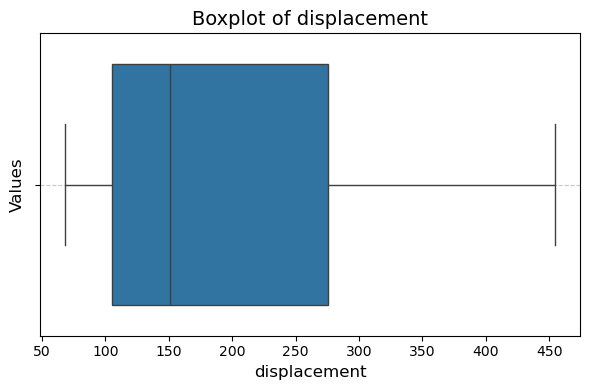

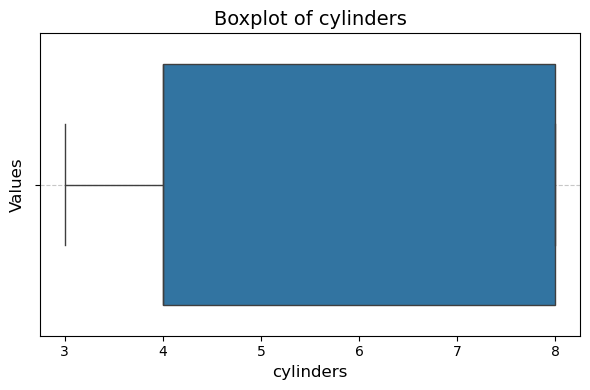

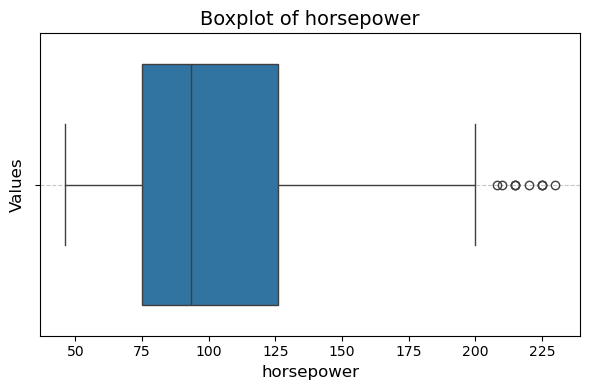

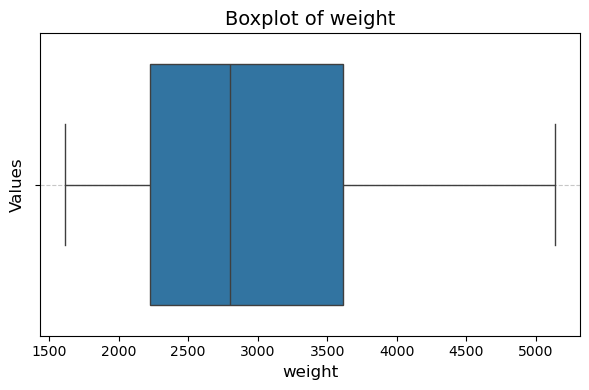

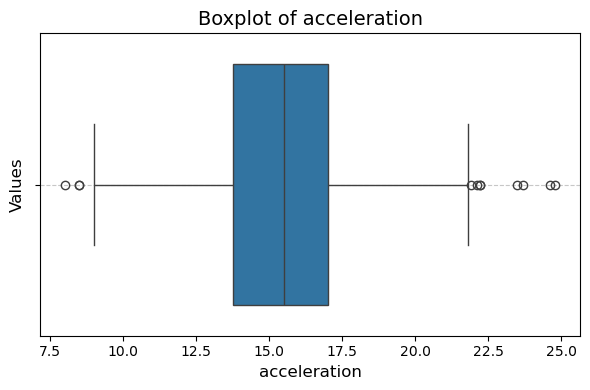

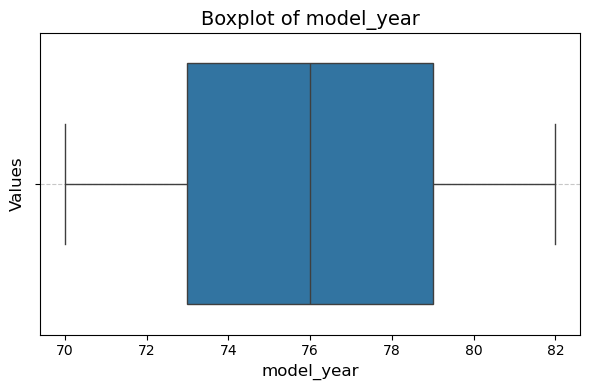

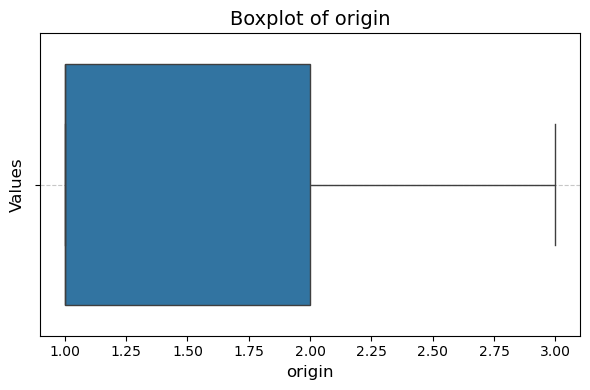

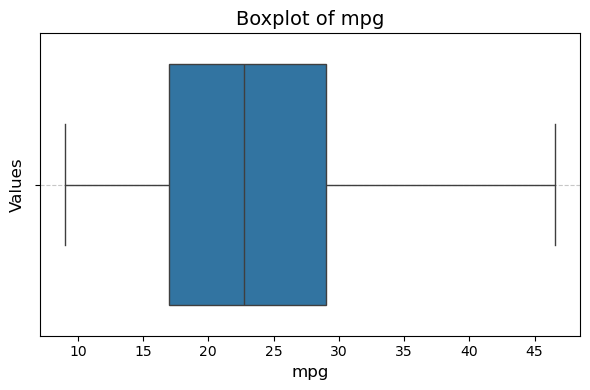

In [21]:
# Membuat boxplot untuk tipe data numerik

def boxplot(columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=column)
        plt.title(f'Boxplot of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

boxplot(num_cols)

In [22]:
def handle_outlier(df, column):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))
        print(f'Handling outliers in column {column}')

In [23]:
handle_outlier(df, [num_cols])

Handling outliers in column displacement
Handling outliers in column cylinders
Handling outliers in column horsepower
Handling outliers in column weight
Handling outliers in column acceleration
Handling outliers in column model_year
Handling outliers in column origin
Handling outliers in column mpg


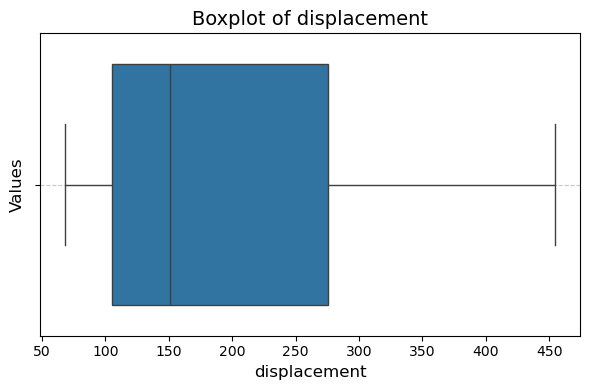

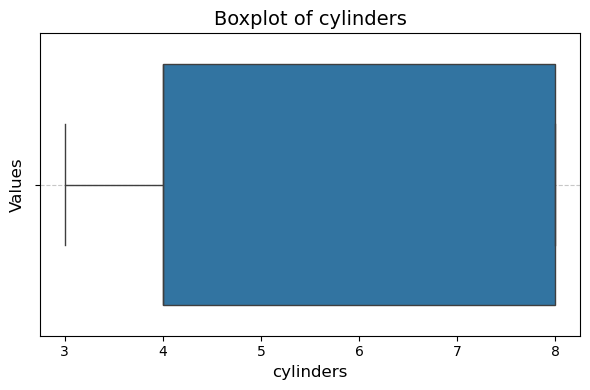

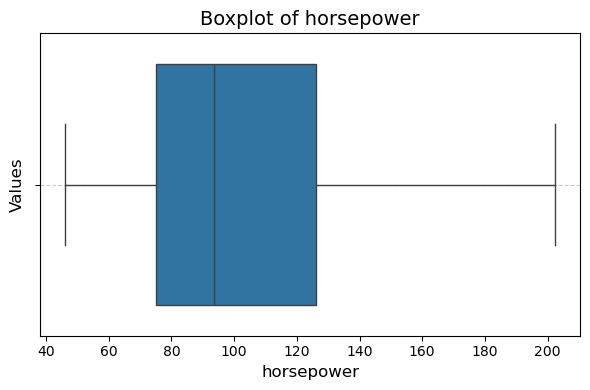

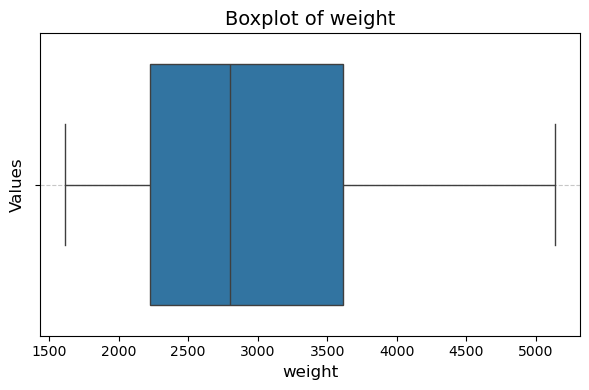

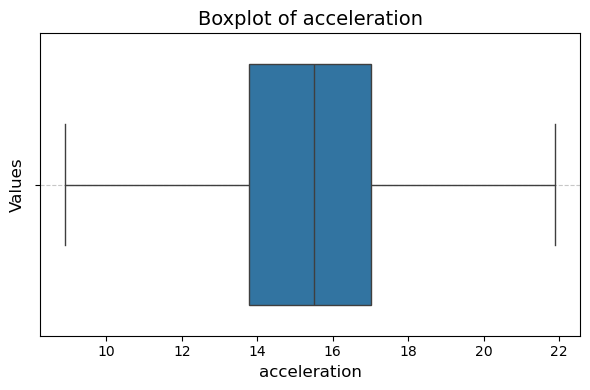

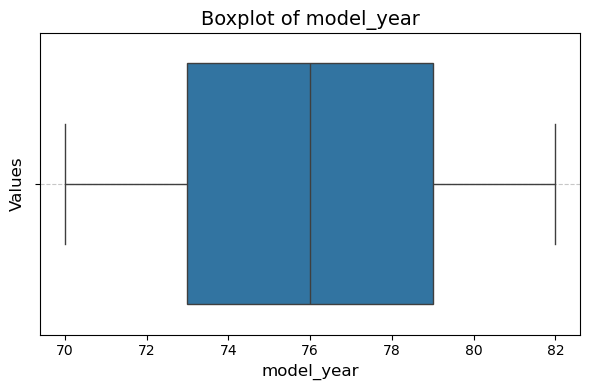

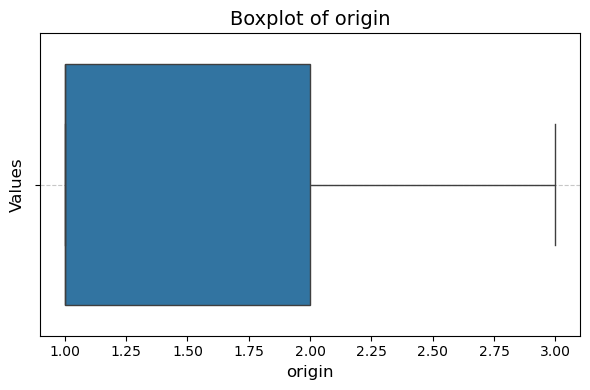

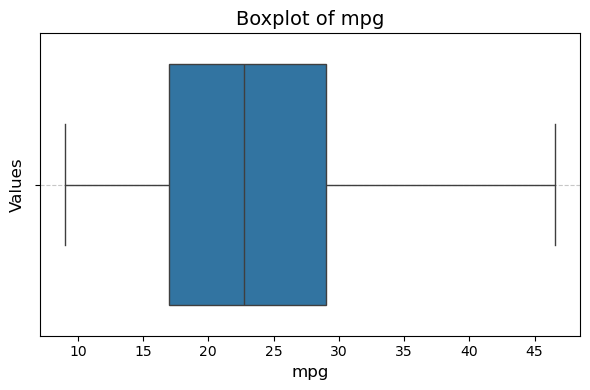

In [24]:
boxplot(num_cols)

### Univariate Analysis

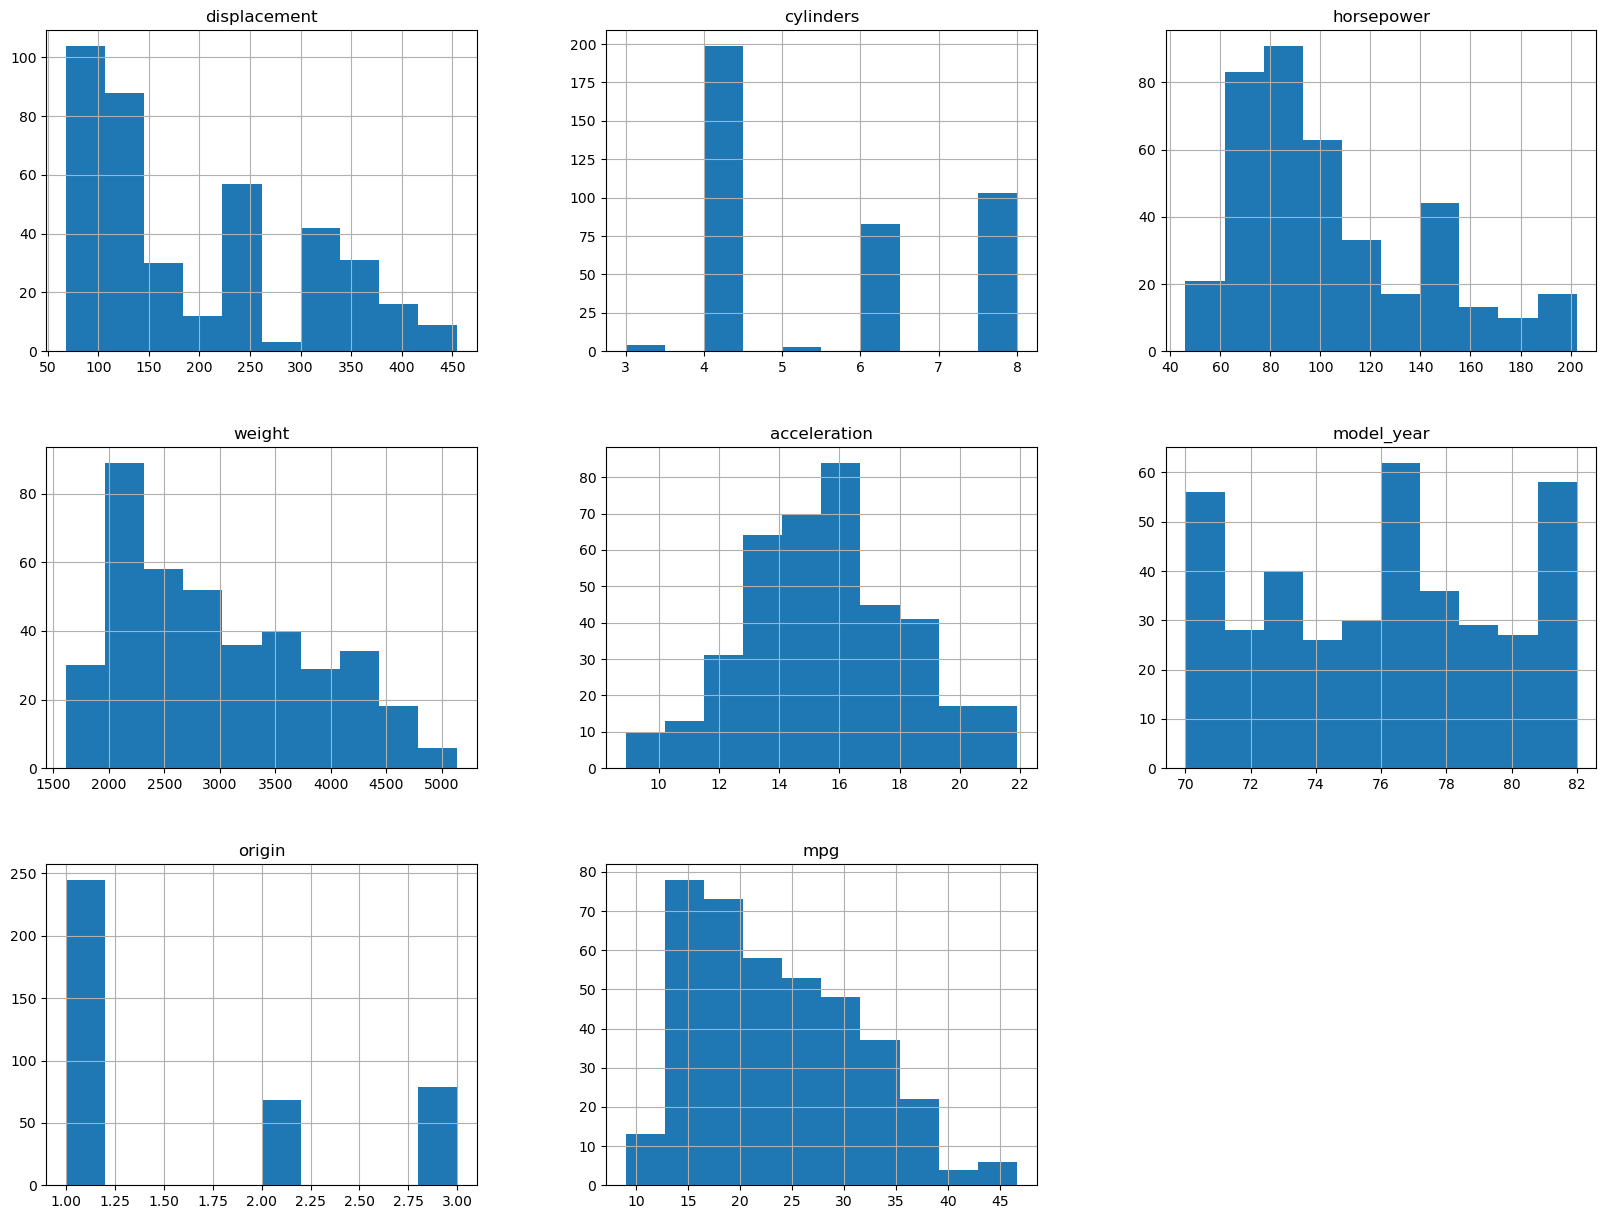

In [25]:
df.hist(bins=10, figsize=(20,15))
plt.show()

### Multivariate Analysis

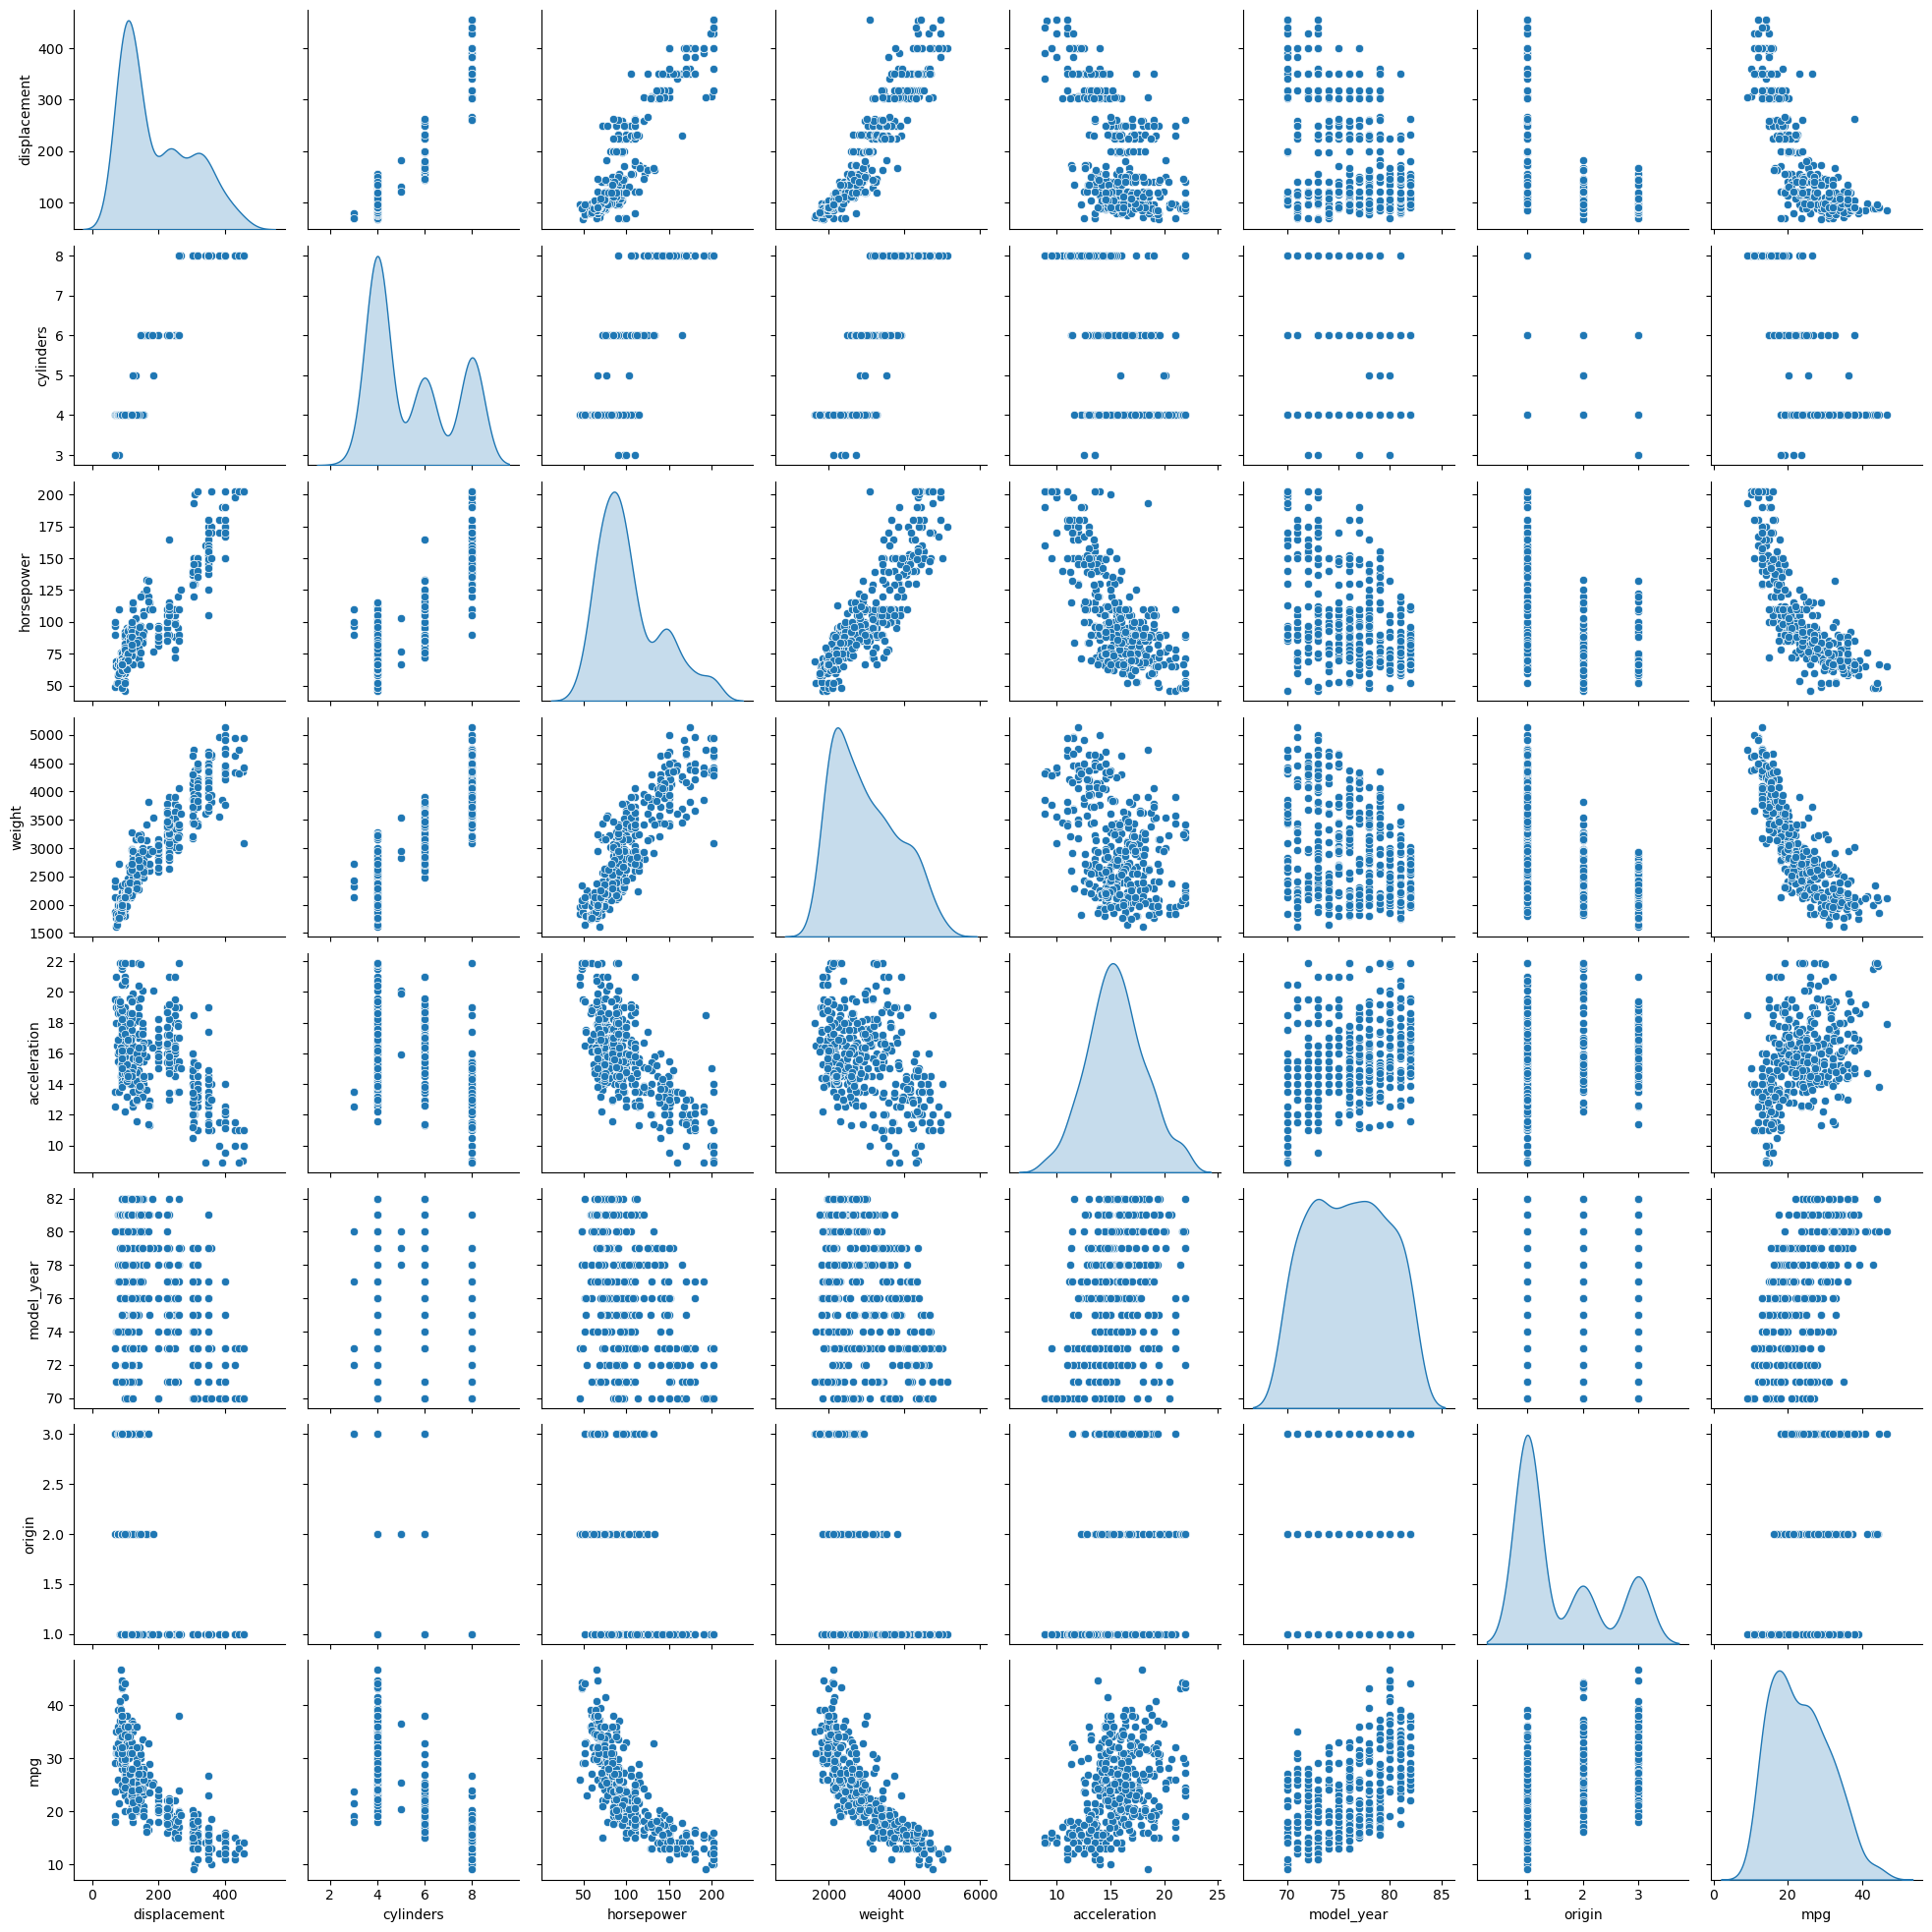

In [26]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')
plt.show()


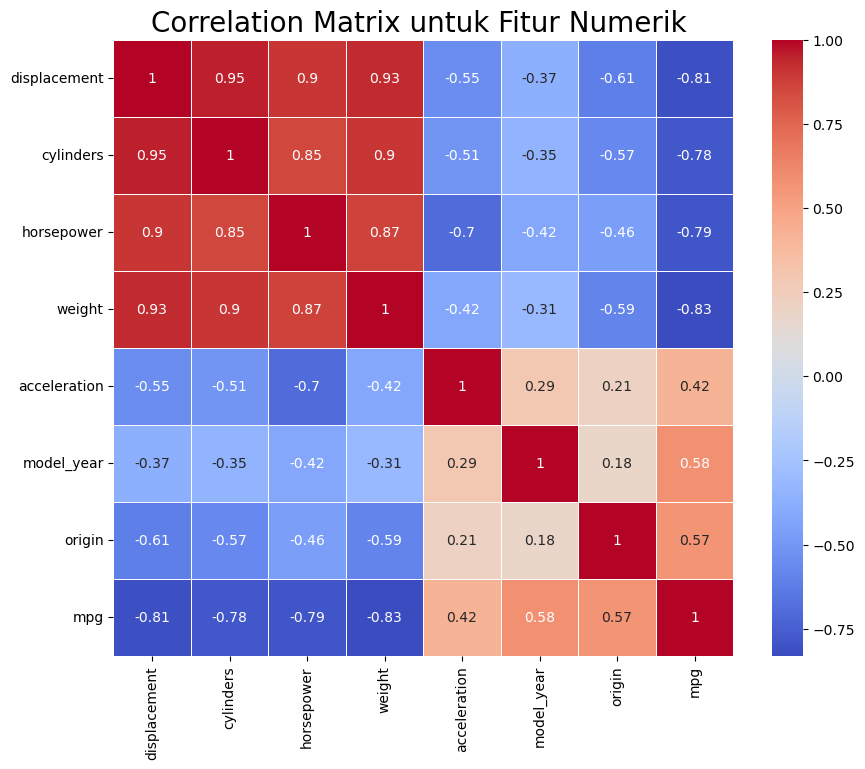

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

### Data Preparation

In [28]:
# X (Fitur) = Semua kolom kecuali 'mpg'
X = df.drop(columns=['mpg'])

# y (Target) = Kolom 'mpg'
y = df['mpg']

In [29]:
# Split data
# Membagi data 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:

scaler = StandardScaler()

# Fit dan transform data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing
X_test_scaled = scaler.transform(X_test)


In [31]:
# Model Sequential dengan 3 layer
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


2025-02-17 17:43:05.519915: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [32]:
# Training model selama 100 epoch
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, verbose=1)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 614.1178 - mae: 23.4911 - val_loss: 655.8667 - val_mae: 24.3866
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 543.1152 - mae: 22.0058 - val_loss: 613.1011 - val_mae: 23.4980
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 492.0234 - mae: 20.7057 - val_loss: 546.5418 - val_mae: 22.0613
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 424.4128 - mae: 19.1825 - val_loss: 438.8471 - val_mae: 19.5188
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 351.3939 - mae: 16.9745 - val_loss: 282.2405 - val_mae: 15.2526
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 195.0195 - mae: 12.1093 - val_loss: 122.0306 - val_mae: 9.8814
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76.6331 - mae: 7.5349 - val_loss: 50.0157 - val_mae: 6.0381
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.1840 - mae: 5.8405 - val_loss: 50.8940 - val_mae: 5.7231
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
# Evaluasi model pada data test
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error (MAE) pada data test: {test_mae:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.6981 - mae: 1.9990
Mean Absolute Error (MAE) pada data test: 2.08


In [34]:
# Prediksi MPG untuk data test
y_pred = model.predict(X_test_scaled)

# Menampilkan hasil prediksi
print("Prediksi MPG:", y_pred.flatten())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediksi MPG: [23.40528   20.67796   34.807133  22.145023  26.898254  29.197405
 12.93164   30.969252  19.674852  29.568205  15.506445  22.626202
 17.019009  27.77727   16.504103  30.137815  19.64609   33.353996
 28.11946   26.345533  19.214796  44.087933  35.87981   16.16456
 30.303705  24.209496  15.590402  17.02025   27.606548  19.272085
 14.561005  20.169748  17.8991    33.79613   13.97788   37.01887
 14.035281  22.744825  12.974124   9.838502  15.7403755 28.046373
 34.173378  26.436258  15.100897  13.61998   17.37574   31.806858
 20.453623  30.396048  13.212045  22.81441   21.110992  33.71976
 26.347239  14.931427  16.95151   19.392717  19.208696  23.91065
 13.827265  18.35391   24.06798   19.899591  26.254492  25.858866
 26.163317  30.000555  18.207853  13.846107  19.61135   12.554151
 24.79862   27.171297  25.030096  25.225405  14.146293  15.823365
 25.314169 ]
